# three body

### reference:
1. [matplot animation](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
2. [three body](https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767)

In [5]:
import numpy as np
import scipy as sci

#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [6]:
#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m

#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s

#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [10]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [69]:
#Package initial parameters
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D

time_span=np.linspace(0,8,300) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [70]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

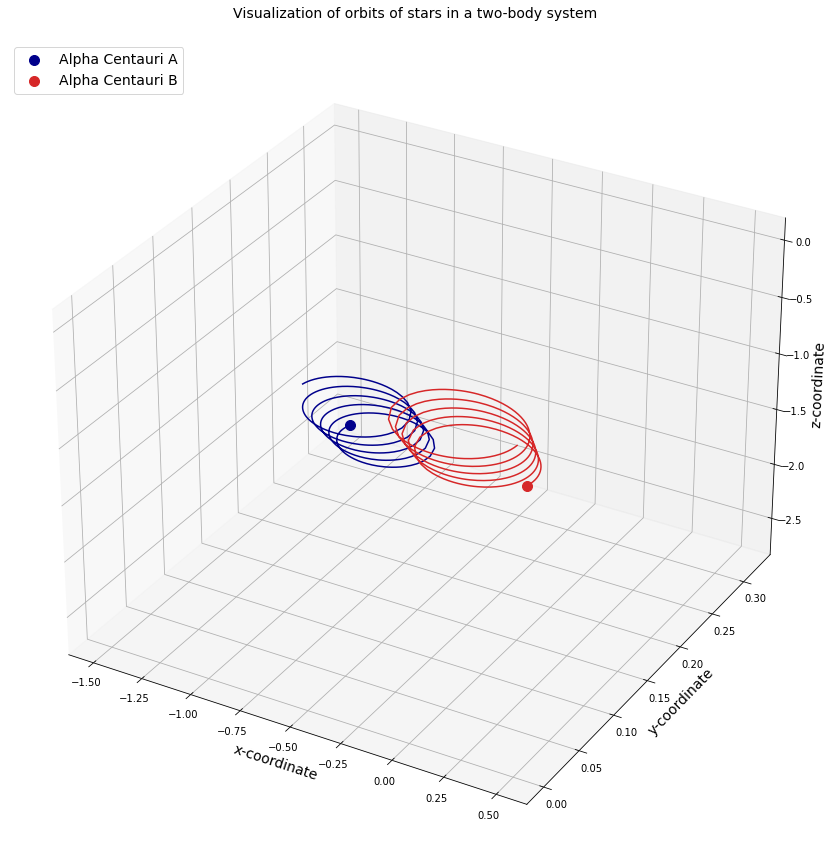

In [13]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

## animation

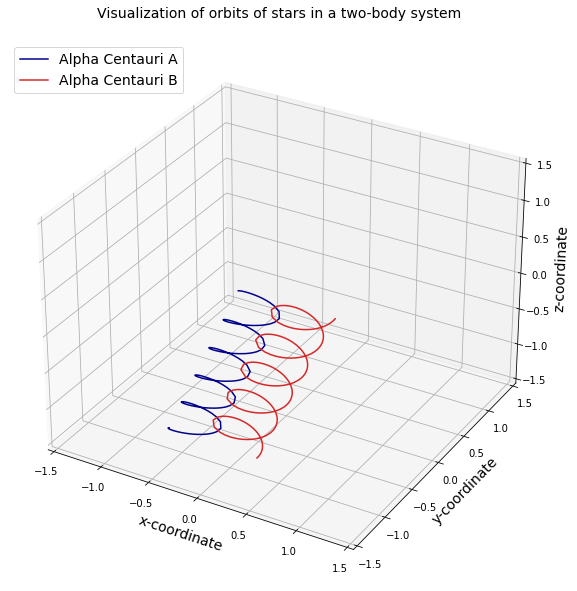

In [71]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

sol = [r1_sol, r2_sol]
colors = ["darkblue", "tab:red"]
labels = ["Alpha Centauri A", "Alpha Centauri B"]

lines = []
for i in range(2):
    line, = ax.plot([], [], [], color=colors[i], label=labels[i])
    lines.append(line)

def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])
    return lines

def animate(i):
    for m, line in enumerate(lines):
        s = sol[m]
        x, y, z = s[:i ,0], s[:i, 1], s[:i, 2]

        line.set_data(x, y)
        line.set_3d_properties(z)
    return lines

anim = animation.FuncAnimation(fig, 
                                 animate, 
                                 init_func=init, 
                                 frames=300, 
                                 interval=100, 
                                 blit=True)

# ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
# ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n", fontsize=14)
ax.legend(loc="upper left", fontsize=14)

anim.save('treebody.gif', writer=animation.PillowWriter())